# Установим и импортируем библиотеки
### Для анализа текста
* PyMorphy2
* natasha

### Для обработки и визуализации данных:
* re
* pandas
* matplotlib
* seaborn




In [ ]:
!pip install pymorphy2
!pip install natasha
!pip install conllu

In [ ]:
import pymorphy2
import re
import conllu
import pandas

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Добавляем файл с текстом в окружение и загружаем его в проект

In [ ]:
text = open('data.txt').read()
data = text.replace('\n', ' ').split()

### Объявим вспомогательную функцию ```calculate_distribution``` для подчсета распределения частей речи. Для каждого слова из входного массива ```to_process``` будет определена часть речи с помощью модуля ```MorphAnalyzer``` из библиотеки ```PyMorphy2```


In [ ]:
def calculate_distribution(to_process):
  morph = pymorphy2.MorphAnalyzer()
  distribution = {}
  for i in to_process:
    if str(morph.parse(i)[0].tag.POS) not in distribution:
      distribution[str(morph.parse(i)[0].tag.POS)] = 0
    distribution[str(morph.parse(i)[0].tag.POS)] += 1
  return {k: v for k, v in sorted(distribution.items(), key=lambda item: -item[1])}

In [ ]:
sns.set_theme(style="whitegrid")

### Функция ```barplot_dict``` выведет столбчатую диаграмму для данного распределения

In [ ]:
def barplot_dict(distr):
  df = pandas.DataFrame(distr, index=[0])
  values = df.values.flatten()
  ax = sns.barplot(x=df.columns, y=values)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  plt.show()

### Разбиваем текст на слова, очищаем от знаков препинания и сохраняем в массив ```cleaned_data```

In [ ]:
cleaned_data = []
for i in data:
  cleaned_data.append(re.sub('\d+', '', re.sub(r'[^\w\s-]', '', i.lower())))

In [ ]:
cleaned_data

['засыпет',
 'снег',
 'дороги',
 'завалит',
 'скаты',
 'крыш',
 'пойду',
 'размять',
 'я',
 'ноги',
 'за',
 'дверью',
 'ты',
 'стоишь',
 'одна',
 'в',
 'пальто',
 'осеннем',
 'без',
 'шляпы',
 'без',
 'калош',
 'ты',
 'борешься',
 'с',
 'волненьем',
 'и',
 'мокрый',
 'снег',
 'жуешь',
 'деревья',
 'и',
 'ограды',
 'уходят',
 'вдаль',
 'во',
 'мглу',
 'одна',
 'средь',
 'снегопада',
 'стоишь',
 'ты',
 'на',
 'углу',
 'течет',
 'вода',
 'с',
 'косынки',
 'по',
 'рукаву',
 'в',
 'обшлаг',
 'и',
 'каплями',
 'росинки',
 'сверкают',
 'в',
 'волосах',
 'и',
 'прядью',
 'белокурой',
 'озарены',
 'лицо',
 'косынка',
 'и',
 'фигура',
 'и',
 'это',
 'пальтецо',
 'снег',
 'на',
 'ресницах',
 'влажен',
 'в',
 'твоих',
 'глазах',
 'тоска',
 'и',
 'весь',
 'твой',
 'облик',
 'слажен',
 'из',
 'одного',
 'куска',
 'как',
 'будто',
 'бы',
 'железом',
 'обмокнутым',
 'в',
 'сурьму',
 'тебя',
 'вели',
 'нарезом',
 'по',
 'сердцу',
 'моему',
 'и',
 'в',
 'нем',
 'навек',
 'засело',
 'смиренье',
 'этих',


### Посчитаем распределение частей речи для исходного текста


In [ ]:
cleaned_distribution = calculate_distribution(cleaned_data)

In [ ]:
cleaned_distribution

{'ADJF': 15,
 'ADJS': 4,
 'ADVB': 5,
 'CONJ': 18,
 'INFN': 2,
 'NOUN': 49,
 'NPRO': 10,
 'PRCL': 3,
 'PRED': 2,
 'PREP': 22,
 'PRTF': 1,
 'PRTS': 1,
 'VERB': 14}

### Посчитаем количество уникальных слов в тексте. Ячейка ниже проходится по всем словам исходного текста, нормализует их и сохраняет в set ```unique_words_data```.

In [ ]:
morph = pymorphy2.MorphAnalyzer()
unique_words_data = set()
for i in cleaned_data:
  unique_words_data.add(morph.parse(i)[0].normal_form)

In [ ]:
unique_words_data

{'а',
 'без',
 'белокурый',
 'бороться',
 'будто',
 'бы',
 'в',
 'вдаль',
 'вели',
 'весь',
 'влажный',
 'вода',
 'волнение',
 'волос',
 'глаз',
 'год',
 'граница',
 'дверь',
 'двоиться',
 'дело',
 'дерево',
 'дорога',
 'жевать',
 'железо',
 'жестокосердый',
 'за',
 'завалить',
 'засесть',
 'засыпать',
 'и',
 'из',
 'как',
 'калоша',
 'капля',
 'когда',
 'косынка',
 'крыша',
 'кто',
 'кусок',
 'лицо',
 'мгла',
 'меж',
 'мой',
 'мокрый',
 'мочь',
 'мы',
 'на',
 'навек',
 'нарез',
 'не',
 'немой',
 'нет',
 'но',
 'нога',
 'ночь',
 'облик',
 'обмокнуть',
 'обшлаг',
 'ограда',
 'один',
 'озарить',
 'осенний',
 'остаться',
 'от',
 'откуда',
 'оттого',
 'пальтецо',
 'пальто',
 'пересуд',
 'по',
 'пойти',
 'провести',
 'прядь',
 'размять',
 'ресница',
 'росинка',
 'рукав',
 'с',
 'сверкать',
 'свет',
 'сердце',
 'скат',
 'слаженный',
 'смирение',
 'снег',
 'снегопад',
 'средь',
 'стоить',
 'сурьма',
 'твой',
 'течь',
 'тоска',
 'тот',
 'ты',
 'угол',
 'уходить',
 'фигура',
 'черта',
 'что',
 

### Посчитаем распределение частей речи для уникальных слов


In [ ]:
unique_distribution = calculate_distribution(unique_words_data)

In [ ]:
unique_distribution

{'ADJF': 13,
 'ADVB': 4,
 'CONJ': 7,
 'INFN': 15,
 'NOUN': 46,
 'NPRO': 4,
 'PRCL': 3,
 'PRED': 1,
 'PREP': 10}

### Выведем распределение частей речи до и после очистки, число использованных слов и число уникальных слов

In [ ]:
df = pandas.DataFrame([cleaned_distribution, unique_distribution], index=['Cleaned', 'Unique'])
df['Summary'] = df[list(df.columns)].sum(axis=1)

In [ ]:
df

,NOUN,PREP,CONJ,ADJF,VERB,NPRO,ADVB,ADJS,PRCL,INFN,PRED,PRTS,PRTF,Summary
Cleaned,49,22,18,15,14.0,10,5,4.0,3,2,2,1.0,1.0,146.0
Unique,46,10,7,13,NaN,4,4,NaN,3,15,1,NaN,NaN,103.0


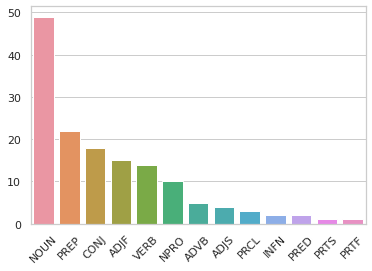

In [ ]:
barplot_dict(cleaned_distribution)

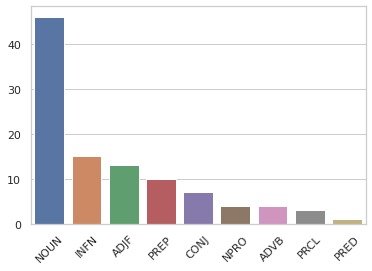

In [ ]:
barplot_dict(unique_distribution)

### Для лучшей визуализации выведем распределение до и после очистки на одной диаграмме

In [ ]:
df = {}
q = list(cleaned_distribution.keys())
q.extend(list(unique_distribution.keys()))
df['POS'] = q
df['Cleaned'] = []
df['Unique'] = []
for i in df['POS']:
  if i not in cleaned_distribution:
    df['Cleaned'].append(0)
  else:
    df['Cleaned'].append(cleaned_distribution[i])
  if i not in unique_distribution:
    df['Unique'].append(0)
  else:
    df['Unique'].append(unique_distribution[i])


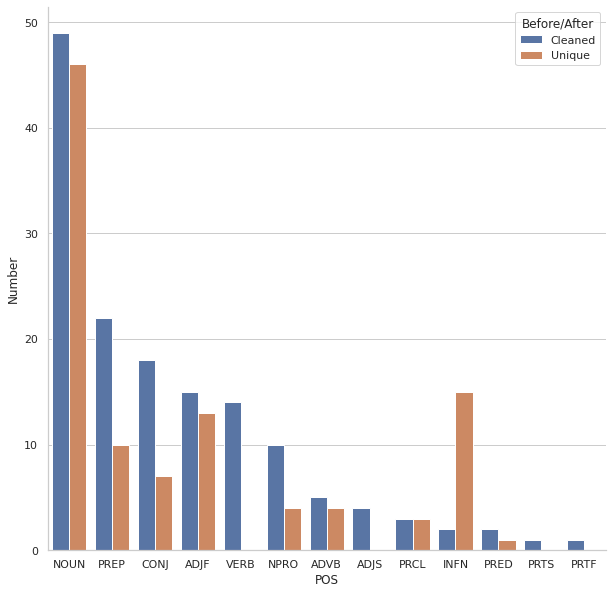

In [ ]:
df = pandas.DataFrame(df)
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='POS').set_axis(['POS', 'Before/After', 'Number'], axis=1, inplace=False)
sns.barplot(x='POS', y='Number', hue='Before/After', data=tidy, ax=ax1)
sns.despine(fig)

### Порядок следования прилагательных и существительных

In [ ]:
noun_adj = 0
adj_noun = 0
for i in range(len(cleaned_data) - 1):
  word1 = morph.parse(cleaned_data[i])[0].normal_form
  word2 = morph.parse(cleaned_data[i+1])[0].normal_form
  if str(morph.parse(word1)[0].tag.POS) == 'NOUN' and str(morph.parse(word2)[0].tag.POS) == 'ADJF':
    print(1, word1, word2)
    noun_adj += 1
  elif str(morph.parse(word2)[0].tag.POS) == 'NOUN' and str(morph.parse(word1)[0].tag.POS) == 'ADJF':
    adj_noun += 1
    print(2, word1, word2)


1 пальто осенний
2 мокрый снег
1 мгла один
1 прядь белокурый
1 ресница влажный
2 твой глаз
2 твой облик
1 облик слаженный
2 один кусок
1 сердце мой
1 смирение этот
2 этот черта
1 свет жестокосердый
2 этот ночь
2 тот год


In [ ]:
print('Noun + adectif: ', noun_adj)
print('Adectif + noun: ', adj_noun)

Noun + adectif:  8
Adectif + noun:  7


### Conllu файл:

In [ ]:
doc = Doc(text)

### Подготовим исходный текст с помощью парсера ```natasha```: разобьем на слова, нормализуем и разметим для дальнейшего синатксического анализа


In [ ]:
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
morph_vocab = MorphVocab()
doc.segment(segmenter)

In [ ]:
print(doc.tokens[:5]) # первые 5 размеченных слов
print(doc.sents[:5])  # первые 5 размеченных предложений

[DocToken(stop=7, text='Засыпет'), DocToken(start=8, stop=12, text='снег'), DocToken(start=13, stop=19, text='дороги'), DocToken(start=19, stop=20, text=','), DocToken(start=21, stop=28, text='Завалит')]
[DocSent(stop=40, text='Засыпет снег дороги,\nЗавалит скаты крыш.', tokens=[...]), DocSent(start=41, stop=83, text='Пойду размять я ноги:\nЗа дверью ты стоишь.', tokens=[...]), DocSent(start=85, stop=175, text='Одна, в пальто осеннем,\nБез шляпы, без калош,\nТ..., tokens=[...]), DocSent(start=177, stop=216, text='Деревья и ограды\nУходят вдаль, во мглу.', tokens=[...]), DocSent(start=217, stop=256, text='Одна средь снегопада\nСтоишь ты на углу.', tokens=[...])]


In [ ]:
doc.tag_morph(morph_tagger)
print(doc.tokens[:5])
doc.sents[0].morph.print()

[DocToken(stop=7, text='Засыпет', pos='ADJ', feats=<Nom,Pos,Masc,Sing>), DocToken(start=8, stop=12, text='снег', pos='NOUN', feats=<Inan,Nom,Masc,Sing>), DocToken(start=13, stop=19, text='дороги', pos='NOUN', feats=<Inan,Gen,Fem,Sing>), DocToken(start=19, stop=20, text=',', pos='PUNCT'), DocToken(start=21, stop=28, text='Завалит', pos='PROPN', feats=<Inan,Acc,Fem,Sing>)]
             Засыпет ADJ|Case=Nom|Degree=Pos|Gender=Masc|Number=Sing
                снег NOUN|Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing
              дороги NOUN|Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing
                   , PUNCT
             Завалит PROPN|Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing
               скаты NOUN|Animacy=Inan|Case=Acc|Gender=Masc|Number=Plur
                крыш NOUN|Animacy=Inan|Case=Gen|Gender=Fem|Number=Plur
                   . PUNCT


In [ ]:
for token in doc.tokens:
  token.lemmatize(morph_vocab)

In [ ]:
doc.sents[0].tokens

[DocToken(stop=7, text='Засыпет', pos='ADJ', feats=<Nom,Pos,Masc,Sing>, lemma='засыпать'),
 DocToken(start=8, stop=12, text='снег', pos='NOUN', feats=<Inan,Nom,Masc,Sing>, lemma='снег'),
 DocToken(start=13, stop=19, text='дороги', pos='NOUN', feats=<Inan,Gen,Fem,Sing>, lemma='дорога'),
 DocToken(start=19, stop=20, text=',', pos='PUNCT', lemma=','),
 DocToken(start=21, stop=28, text='Завалит', pos='PROPN', feats=<Inan,Acc,Fem,Sing>, lemma='завалить'),
 DocToken(start=29, stop=34, text='скаты', pos='NOUN', feats=<Inan,Acc,Masc,Plur>, lemma='скат'),
 DocToken(start=35, stop=39, text='крыш', pos='NOUN', feats=<Inan,Gen,Fem,Plur>, lemma='крыша'),
 DocToken(start=39, stop=40, text='.', pos='PUNCT', lemma='.')]

### Выведем деревья зависимостей для двух предложений

In [ ]:
doc.parse_syntax(syntax_parser)
doc.sents[-1].syntax.print()
doc.sents[-2].syntax.print()

      ┌──────────► Но       cc
      │ ┌────────► кто      nsubj
      │ │ ┌──────► мы       nsubj
      │ │ │     ┌► и        advmod
┌─────│ │ │     └─ откуда   
│ ┌──►│ │ │        ,        punct
│ │ ┌►│ │ │        Когда    advmod
│ │ │ │ │ │ ┌────► от       case
│ │ │ │ │ │ │ ┌──► всех     det
│ │ │ │ │ │ │ │ ┌► тех      det
│ │ │ │ │ │ └─└─└─ лет      obl
│ │ │ └─└─└─┌─└─┌─ Остались 
│ │ │   │ │ │   └► пересуды nsubj
│ │ │   │ │ └────► ,        punct
│ │ │   │ │ ┌────► А        cc
│ │ │   │ │ │ ┌──► нас      nsubj
│ │ │   │ │ │ │ ┌► на       case
│ │ │   │ └►│ │ └─ свете    obl
└►└─└───│   └─└─── нет      acl:relcl
        └────────► ?        punct
          ┌──► И        cc
          │ ┌► оттого   advmod
┌─────┌─┌─└─└─ двоится  
│     │ │ ┌──► Вся      det
│     │ │ │ ┌► эта      det
│     │ └►└─└─ ночь     nsubj
│     │     ┌► в        case
│     └────►└─ снегу    obl
│ ┌──────────► ,        punct
│ │ ┌────────► И        cc
│ │ │ ┌►┌───┌─ провести xcomp
│ │ │ │ │ ┌─└► границы  obj

In [ ]:
doc.tokens

### На основе разметки, созданной библиотекой ```natasha``` создадим conllu файл

In [ ]:
with open('new.conllu', 'w') as f:
  for sent in doc.sents:
    id = 1
    for token in sent.tokens:
      feats = ''.join([u + '=' + token.feats[u] + '|' for u in token.feats])[:-1]
      feats = '_' if feats == '' else feats
      f.write("%d   %20s   %10s    %10s   _       %s        %d         %s   _   _ \n" % (id, token.text, token.lemma, token.pos, feats,  int(token.head_id.split('_')[-1]), token.rel))
      id += 1


### Проверим, что он открывается библиотекой conllu

In [ ]:
cnl = conllu.parse(open('new.conllu').read())

In [ ]:
cnl[0]

TokenList<Засыпет, снег, дороги, ,, Завалит, скаты, крыш, ., Пойду, размять, я, ноги, :, За, дверью, ты, стоишь, ., Одна, ,, в, пальто, осеннем, ,, Без, шляпы, ,, без, калош, ,, Ты, борешься, с, волненьем, И, мокрый, снег, жуешь, ., Деревья, и, ограды, Уходят, вдаль, ,, во, мглу, ., Одна, средь, снегопада, Стоишь, ты, на, углу, ., Течет, вода, с, косынки, По, рукаву, в, обшлаг, ,, И, каплями, росинки, Сверкают, в, волосах, ., И, прядью, белокурой, Озарены, :, лицо, ,, Косынка, ,, и, фигура, ,, И, это, пальтецо, ., Снег, на, ресницах, влажен, ,, В, твоих, глазах, тоска, ,, И, весь, твой, облик, слажен, Из, одного, куска, ., Как, будто, бы, железом, ,, Обмокнутым, в, сурьму, ,, Тебя, вели, нарезом, По, сердцу, моему, ., И, в, нем, навек, засело, Смиренье, этих, черт, ,, И, оттого, нет, дела, ,, Что, свет, жестокосерд, ., И, оттого, двоится, Вся, эта, ночь, в, снегу, ,, И, провести, границы, Меж, нас, я, не, могу, ., Но, кто, мы, и, откуда, ,, Когда, от, всех, тех, лет, Остались, пересуды